In [ ]:
# importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# importing the dataset
from tensorflow.keras.datasets import mnist
# loading the data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# shape of x_train (no, height, width) of pixels
x_train.shape

(60000, 28, 28)

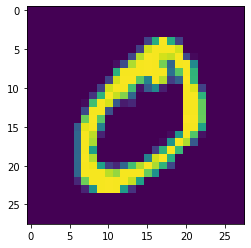

In [ ]:
# to plot the image , its grey scale thats why looks like this
plt.imshow(x_train[1])

In [ ]:
# for One-Hot encoding 
from tensorflow.keras.utils import to_categorical

In [ ]:
# one-Hot encoding the y data
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [ ]:
# result after one-hot encoding
y_cat_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x_train[1].max()

255

In [ ]:
# scaling the image with values from 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
# grey scale image hence 1 channel , the last number represents the channel
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
# imports for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# creating our machine learning model
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
# early stopping to avoid over fitting
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
# training the model
model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test,y_cat_test), callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1409 - accuracy: 0.9578 - val_loss: 0.0500 - val_accuracy: 0.9828
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0473 - val_accuracy: 0.9849
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0366 - val_accuracy: 0.9878
Epoch 4/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0212 - accuracy: 0.9927 - val_loss: 0.0361 - val_accuracy: 0.9884
Epoch 5/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0144 - accuracy: 0.9950 - val_loss: 0.0414 - val_accuracy: 0.9880
Epoch 6/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0432 - val_accuracy: 0.9871


In [ ]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.140907,0.957817,0.050034,0.9828
1,0.047894,0.985050,0.047300,0.9849
2,0.030860,0.990083,0.036584,0.9878
3,0.021204,0.992700,0.036138,0.9884
4,0.014404,0.995017,0.041367,0.9880


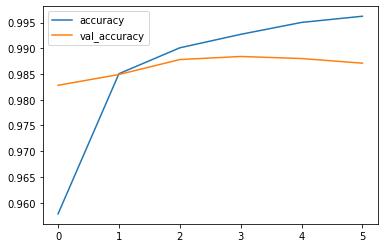

In [ ]:
losses[['accuracy','val_accuracy']].plot()

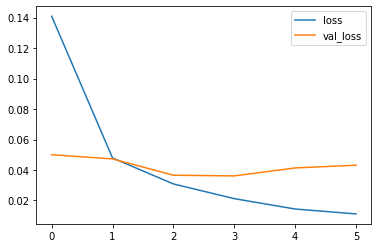

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
print(model.evaluate(x_test,y_cat_test,verbose=0))

[0.043159205466508865, 0.9871000051498413]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
# comparing true results with predictions for classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# comparing true results with predictions for confusion matrix
confusion_matrix(y_test,predictions)

array([[ 969,    1,    1,    0,    0,    2,    5,    1,    0,    1],
       [   0, 1133,    1,    0,    0,    0,    0,    0,    1,    0],
       [   1,    2, 1022,    0,    1,    0,    0,    5,    1,    0],
       [   0,    0,    1, 1004,    0,    2,    0,    1,    2,    0],
       [   0,    0,    2,    0,  975,    0,    1,    0,    0,    4],
       [   1,    0,    0,    7,    0,  879,    3,    0,    1,    1],
       [   3,    4,    1,    0,    4,    1,  943,    0,    2,    0],
       [   0,    2,    7,    0,    1,    0,    0, 1011,    2,    5],
       [   4,    1,    4,    1,    0,    1,    3,    3,  955,    2],
       [   0,    3,    0,    1,    9,    8,    0,    5,    3,  980]])

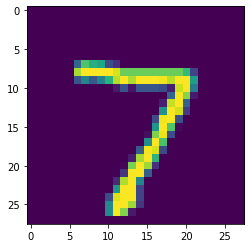

In [ ]:
my_num = x_test[0]
plt.imshow(my_num.reshape(28,28))

In [ ]:
# predicting on a image
model.predict_classes(my_num.reshape(1,28,28,1))

array([7])

In [ ]:
## BONUS ##

In [ ]:
# what is transform and fit_transform

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
x = [[np.nan, 11], 
     [4,      np.nan], 
     [8,      2],
     [np.nan, 1]]

In [ ]:
scaler = StandardScaler()

In [ ]:
x_fit = scaler.fit(x)

In [ ]:
print(x_fit)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
x_transform = scaler.transform(x)

In [ ]:
print(x_transform)

[[        nan  1.4083737 ]
 [-1.                 nan]
 [ 1.         -0.59299945]
 [        nan -0.81537425]]


In [ ]:
x_fit_transform = scaler.fit_transform(x)

In [ ]:
print(x_fit_transform)

[[        nan  1.4083737 ]
 [-1.                 nan]
 [ 1.         -0.59299945]
 [        nan -0.81537425]]


In [ ]:
x_train : x_fit_transform
x_test : x_transform